# What's the difference between bertmodel & bert model for classification in HuggingFace?

The main difference between `BertModel` and `BertForSequenceClassification` in Hugging Face lies in their **intended use** and **architectural modifications**:


---

### **1. `BertModel`**
- **Purpose**: It provides the core BERT model, returning the raw embeddings (hidden states) for each token in the input sequence. It is a general-purpose model, useful for tasks where you need the raw outputs (e.g., embeddings) and want to build a custom head for your specific task.

- **Inputs**: 
  - Takes tokenized input (e.g., token IDs, attention masks).
  
- **Outputs**:
  - `last_hidden_state`: The final layer's hidden states for all tokens (shape: `[batch_size, sequence_length, hidden_size]`).
  - `pooler_output`: The pooled output from the `[CLS]` token (shape: `[batch_size, hidden_size]`), typically used as a sequence-level representation.

- **Use Case**:
  - When you want to customize the model for tasks like named entity recognition, sentence similarity, etc.
  - If you need embeddings for downstream tasks but don't need a pre-defined classification head.

- **Example**:
  ```python
  from transformers import BertModel, BertTokenizer
  
  tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
  model = BertModel.from_pretrained('bert-base-uncased')

  inputs = tokenizer("Hello, how are you?", return_tensors="pt")
  outputs = model(**inputs)
  print(outputs.last_hidden_state.shape)  # [batch_size, sequence_length, hidden_size]
  print(outputs.pooler_output.shape)     # [batch_size, hidden_size]
  ```

---

### **2. `BertForSequenceClassification`**
- **Purpose**: This model is specifically designed for sequence classification tasks (e.g., sentiment analysis, spam detection). It wraps `BertModel` and adds a classification head (a feedforward layer) on top of the `[CLS]` token's pooled output.

- **Inputs**: 
  - Same as `BertModel` (e.g., token IDs, attention masks).

- **Outputs**:
  - `logits`: The raw predictions from the classification head (shape: `[batch_size, num_labels]`).

- **Pre-Trained for Specific Tasks**:
  - Pre-trained weights for specific tasks (e.g., SST-2, MRPC) might be available depending on the checkpoint used.

- **Use Case**:
  - For sequence classification tasks like sentiment analysis, text categorization, etc., where you directly need class probabilities or logits.

- **Example**:
  ```python
  from transformers import BertForSequenceClassification, BertTokenizer
  
  tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
  model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

  inputs = tokenizer("Hello, how are you?", return_tensors="pt")
  outputs = model(**inputs)
  print(outputs.logits)  # [batch_size, num_labels]
  ```

---

### **Key Differences**

| **Feature**                   | **`BertModel`**                              | **`BertForSequenceClassification`**           |
|--------------------------------|----------------------------------------------|-----------------------------------------------|
| **Purpose**                   | General-purpose BERT encoder.               | Predefined for classification tasks.          |
| **Outputs**                   | Hidden states, pooler output.               | Logits for classification.                    |
| **Classification Head**       | No classification head.                     | Includes a classification head on `[CLS]`.   |
| **Use Case**                  | Feature extraction, custom tasks.           | Sequence classification tasks directly.       |
| **Architecture**              | Core BERT architecture only.                | BERT + a classification head.                 |

---

### Which One Should You Use?
- Use **`BertModel`** if:
  - You want to build a custom head for your specific task.
  - You need token-level outputs (e.g., for named entity recognition or embeddings).

- Use **`BertForSequenceClassification`** if:
  - You are working on a classification task and want to directly obtain logits or probabilities.
  - You want to fine-tune BERT for a classification task without adding custom layers.

## Installation & setup

In [2]:
import torch
print(torch.__version__)
print("CUDA available:", torch.cuda.is_available())

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

print("Pandas version:", pd.__version__)
print("Matplotlib version:", plt.matplotlib.__version__)
print("NumPy version:", np.__version__)
print("Seaborn version:", sns.__version__)


2.5.1
CUDA available: False
Pandas version: 1.5.3
Matplotlib version: 3.9.4
NumPy version: 1.26.4
Seaborn version: 0.13.2


In [3]:
## imports
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

# helper functions


In [4]:
import textwrap3 as tw
def textwrap(text):
    wrapped_text = tw.wrap(text, width=70)
    print("\n".join(wrapped_text))

## Downloading data

In [5]:
!gdown --id 1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV
# gdown --id 1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV -O specific/filename.ext

C:\Users\Dell\.conda\envs\torch_trans\lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1S6qMioqPJjyBLpLVz4gmRTnJHnjitnuV
To: d:\Generative-AI\BERT MODELS\apps.csv

  0%|          | 0.00/134k [00:00<?, ?B/s]
100%|██████████| 134k/134k [00:00<00:00, 4.11MB/s]


In [6]:
!gdown --id 1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv

C:\Users\Dell\.conda\envs\torch_trans\lib\site-packages\gdown\__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1zdmewp7ayS4js4VtrJEHzAheSW-5NBZv
To: d:\Generative-AI\BERT MODELS\reviews.csv

  0%|          | 0.00/7.17M [00:00<?, ?B/s]
  7%|▋         | 524k/7.17M [00:00<00:02, 2.73MB/s]
 22%|██▏       | 1.57M/7.17M [00:00<00:01, 5.09MB/s]
 44%|████▍     | 3.15M/7.17M [00:00<00:00, 8.43MB/s]
 66%|██████▌   | 4.72M/7.17M [00:00<00:00, 7.17MB/s]
 80%|████████  | 5.77M/7.17M [00:01<00:00, 5.43MB/s]
 95%|█████████▌| 6.82M/7.17M [00:01<00:00, 5.06MB/s]
100%|██████████| 7.17M/7.17M [00:01<00:00, 5.44MB/s]


# **Data & Exploaration**

In [7]:
df = pd.read_csv("./data/reviews.csv")
df.head()

,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,Andrew Thomas,https://lh3.googleusercontent.com/a-/AOh14GiHd...,Update: After getting a response from the deve...,1,21,4.17.0.3,2020-04-05 22:25:57,"According to our TOS, and the term you have ag...",2020-04-05 15:10:24,most_relevant,com.anydo
1,Craig Haines,https://lh3.googleusercontent.com/-hoe0kwSJgPQ...,Used it for a fair amount of time without any ...,1,11,4.17.0.3,2020-04-04 13:40:01,It sounds like you logged in with a different ...,2020-04-05 15:11:35,most_relevant,com.anydo
2,steven adkins,https://lh3.googleusercontent.com/a-/AOh14GiXw...,Your app sucks now!!!!! Used to be good but no...,1,17,4.17.0.3,2020-04-01 16:18:13,This sounds odd! We are not aware of any issue...,2020-04-02 16:05:56,most_relevant,com.anydo
3,Lars Panzerbjørn,https://lh3.googleusercontent.com/a-/AOh14Gg-h...,"It seems OK, but very basic. Recurring tasks n...",1,192,4.17.0.2,2020-03-12 08:17:34,We do offer this option as part of the Advance...,2020-03-15 06:20:13,most_relevant,com.anydo
4,Scott Prewitt,https://lh3.googleusercontent.com/-K-X1-YsVd6U...,Absolutely worthless. This app runs a prohibit...,1,42,4.17.0.2,2020-03-14 17:41:01,We're sorry you feel this way! 90% of the app ...,2020-03-15 23:45:51,most_relevant,com.anydo


In [8]:
df.shape

(15746, 11)

In [9]:
print(df.iloc[0])
print(df.iloc[0]['content'])

userName                                                    Andrew Thomas
userImage               https://lh3.googleusercontent.com/a-/AOh14GiHd...
content                 Update: After getting a response from the deve...
score                                                                   1
thumbsUpCount                                                          21
reviewCreatedVersion                                             4.17.0.3
at                                                    2020-04-05 22:25:57
replyContent            According to our TOS, and the term you have ag...
repliedAt                                             2020-04-05 15:10:24
sortOrder                                                   most_relevant
appId                                                           com.anydo
Name: 0, dtype: object
Update: After getting a response from the developer I would change my rating to 0 stars if possible. These guys hide behind confusing and opaque terms and refuse t

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15746 entries, 0 to 15745
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   userName              15746 non-null  object
 1   userImage             15746 non-null  object
 2   content               15746 non-null  object
 3   score                 15746 non-null  int64 
 4   thumbsUpCount         15746 non-null  int64 
 5   reviewCreatedVersion  13533 non-null  object
 6   at                    15746 non-null  object
 7   replyContent          7367 non-null   object
 8   repliedAt             7367 non-null   object
 9   sortOrder             15746 non-null  object
 10  appId                 15746 non-null  object
dtypes: int64(2), object(9)
memory usage: 1.3+ MB


## check review scores distribution
    - As we can see neutral reviews are high
    - btw, we'll categoize the reviews as negative, nuetral, positive

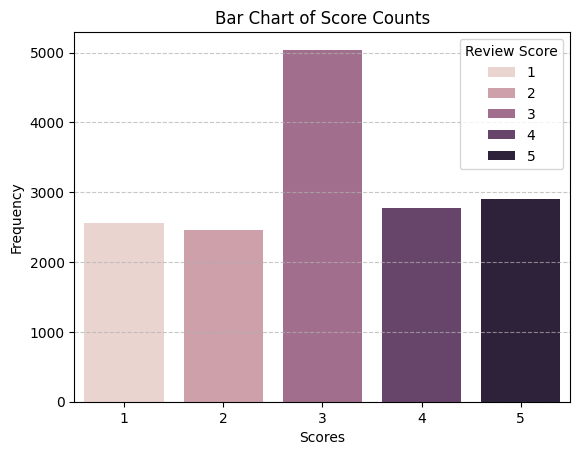

In [11]:
scores_dist= df.score.value_counts().reset_index()
scores_dist.columns= ["Review Score", "frequency"]
sns.barplot(x='Review Score', y='frequency', data=scores_dist, hue='Review Score')
plt.title("Bar Chart of Score Counts")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

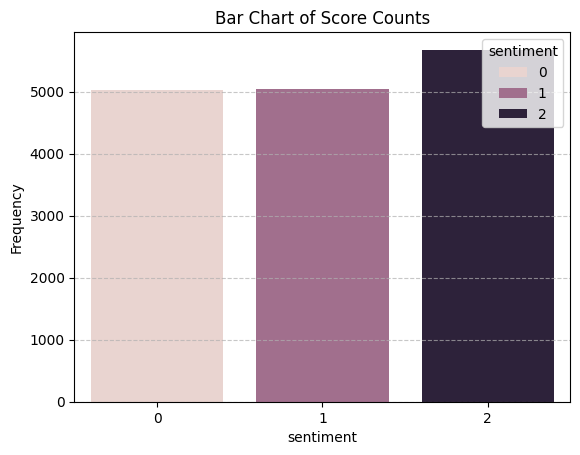

In [12]:
## Categorization of Reviews
def review_categorization(score):
    score= int(score)
    if score <=2:
        return 0
    elif score == 3:
        return 1
    else:
        return 2

classnames= ['Negative', "Neutral", "Positive"]
df['sentiment']=df['score'].apply(review_categorization)

## plot sentiment Distribution
sentiment_dist= df.sentiment.value_counts().reset_index()
sentiment_dist.columns= ["sentiment", "frequency"]
sns.barplot(x='sentiment', y='frequency', data=sentiment_dist, hue='sentiment')
plt.title("Bar Chart of Score Counts")
plt.xlabel("sentiment")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [13]:
df.sentiment.value_counts().reset_index()

,index,sentiment
0,2,5676
1,1,5042
2,0,5028


- Now we almost have equally distributed data

## Data preprocessing

In [14]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

In [15]:
from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [16]:
sample_txt = 'When was I last outside? I am stuck at home for 2 weeks.'

tokens = tokenizer.tokenize(sample_txt)
token_ids = tokenizer.convert_tokens_to_ids(tokens)
print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')

 Sentence: When was I last outside? I am stuck at home for 2 weeks.
   Tokens: ['When', 'was', 'I', 'last', 'outside', '?', 'I', 'am', 'stuck', 'at', 'home', 'for', '2', 'weeks', '.']
Token IDs: [1332, 1108, 146, 1314, 1796, 136, 146, 1821, 5342, 1120, 1313, 1111, 123, 2277, 119]


## special Tokens

    - [SEP] - marker for ending of a sentence

    - [CLS] - we must add this token to the start of each sentence, so BERT knows we’re doing classification

    - There is also a special token for padding:

```
For BERT, each sentence will be tokenized and the [CLS] token will be added at the beginning, and [SEP] token will be added at the end. After tokenization, the format for each sentence would look like:

Input Sequence (after tokenization): [CLS] I love this movie, it's amazing! [SEP]
Input Sequence (after tokenization): [CLS] This product is terrible, do not buy it. [SEP]
```

In [17]:
tokenizer.sep_token, tokenizer.sep_token_id

('[SEP]', 102)

In [18]:
tokenizer.cls_token, tokenizer.cls_token_id

('[CLS]', 101)

In [19]:
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

In [20]:
tokenizer.pad_token, tokenizer.pad_token_id

('[PAD]', 0)

In [21]:
tokenizer.unk_token, tokenizer.unk_token_id

('[UNK]', 100)

In [22]:
tokenizer.special_tokens_map, tokenizer.special_tokens_map_extended

({'unk_token': '[UNK]',
  'sep_token': '[SEP]',
  'pad_token': '[PAD]',
  'cls_token': '[CLS]',
  'mask_token': '[MASK]'},
 {'unk_token': '[UNK]',
  'sep_token': '[SEP]',
  'pad_token': '[PAD]',
  'cls_token': '[CLS]',
  'mask_token': '[MASK]'})

    All of that work can be done using the encode_plus() method:

    1.- Split the sentence into tokens. 2.- Add the special [CLS] and [SEP] tokens. 3.- Map the tokens to their IDs. 4.- Pad or truncate all sentences to the same length. 5.- Create the attention masks which explicitly differentiate real tokens from [PAD] tokens.

In [23]:
encoded_op= tokenizer.encode_plus(sample_txt)
print("encoded_op >> ",encoded_op )
print("Decoded Output >> ", tokenizer.convert_ids_to_tokens(encoded_op['input_ids']))
print("token type ids >> ", encoded_op['token_type_ids'])
print("attention_mask >> ", encoded_op['attention_mask'])


encoded_op >>  {'input_ids': [101, 1332, 1108, 146, 1314, 1796, 136, 146, 1821, 5342, 1120, 1313, 1111, 123, 2277, 119, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}
Decoded Output >>  ['[CLS]', 'When', 'was', 'I', 'last', 'outside', '?', 'I', 'am', 'stuck', 'at', 'home', 'for', '2', 'weeks', '.', '[SEP]']
token type ids >>  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
attention_mask >>  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


    Example Breakdown (Partial):

    101: [CLS] token.
    1332, 1108, 146: These represent subword tokens derived from your input text.
    102: [SEP] token.

-------
    token_type_ids:
    Also called segment IDs, these are used to differentiate between two parts of text, 
    especially in tasks like question answering or sentence-pair classification.

    0: Indicates the first sentence (or single input in your case).
    1: Indicates the second sentence (if present).

    For a single input text (as shown), all values are 0.
----
    attention_mask:
    This binary mask specifies which tokens should be attended to:
    1: Indicates tokens that are part of the actual input text.
    0: Indicates padding tokens (if present)

## ecode_plus is designed to work on one string only, not the list of string, so we need to iterate it over all strings/'

In [24]:
encoding = tokenizer.encode_plus(
    sample_txt, 
    max_length=32,
    add_special_tokens =True,
    return_token_type_ids=False, # make it true for sentence pair classification
    pad_to_max_length= True,
    return_attention_mask = True,
    return_tensors='pt'  # Return PyTorch tensors
)

print("Encoding keys :", encoding.keys())

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


Encoding keys : dict_keys(['input_ids', 'attention_mask'])


In [25]:
## The token ids are now stored in a Tensor and padded to a length of 32:
print(len(encoding['input_ids'][0]))
print(encoding['input_ids'][0])
# 32
# tensor([ 101, 1332, 1108,  146, 1314, 1796,  136,  146, 1821, 5342, 1120, 1313,
#         1111,  123, 2277,  119,  102,    0,    0,    0,    0,    0,    0,    0,
#            0,    0,    0,    0,    0,    0,    0,    0])

## attantion mask also have same length of 32
print(len(encoding['attention_mask'][0]))
print(encoding['attention_mask'])

32
tensor([ 101, 1332, 1108,  146, 1314, 1796,  136,  146, 1821, 5342, 1120, 1313,
        1111,  123, 2277,  119,  102,    0,    0,    0,    0,    0,    0,    0,
           0,    0,    0,    0,    0,    0,    0,    0])
32
tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])


In [26]:
# We can inverse the tokenization to have a look at the special tokens:
print(tokenizer.convert_ids_to_tokens(encoding['input_ids'][0]), end="\n"*2)
textwrap(" ".join(tokenizer.convert_ids_to_tokens(encoding['input_ids'][0])))

['[CLS]', 'When', 'was', 'I', 'last', 'outside', '?', 'I', 'am', 'stuck', 'at', 'home', 'for', '2', 'weeks', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']

[CLS] When was I last outside ? I am stuck at home for 2 weeks . [SEP]
[PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
[PAD] [PAD] [PAD] [PAD]


In [27]:
encoding['attention_mask'].flatten()

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [28]:
encoding['attention_mask'][0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

In [29]:
encoding.keys()

dict_keys(['input_ids', 'attention_mask'])

## out of context this is how tokenizer for sentence pair data look like
-- need to pass two corresponding sentence to tokenizer 


In [30]:
# sentence_pairs = [
#     ("The cat is on the mat.", "The animal is on the mat.")
# ]

# labels = [1, 0]  # For example: 1 = Similar/Entailment, 0 = Contradiction

# # Tokenize the sentence pairs
# encoded_pairs = [tokenizer.encode_plus(
#     s1,
#     s2,
#     add_special_tokens=True,
#     max_length=50,
#     padding="max_length",
#     truncation=True,
#     return_tensors="pt"
# ) for s1, s2 in sentence_pairs]

# # Print tokenized output
# for i, encoded in enumerate(encoded_pairs):
#     print(f"Pair {i + 1}:")
#     print(f"Input IDs: {encoded['input_ids']}")
#     print(f"Token Type IDs: {encoded['token_type_ids']}")
#     print(f"Attention Mask: {encoded['attention_mask']}")
#     print(f"Label: {labels[i]}")
#     print("\n")


In [31]:
pair= ("The cat is on the mat.", "The animal is on the mat.")
s1=pair[0]
s2=pair[1]
op= tokenizer.encode_plus(
    s1,
    s2,
    add_special_tokens=True,
    max_length=50,
    padding="max_length",
    truncation=True,
    return_tensors="pt"
) 

tokens= tokenizer.convert_ids_to_tokens(op['input_ids'][0])
text = " ".join(tokens)
textwrap(text)

[CLS] The cat is on the mat . [SEP] The animal is on the mat . [SEP]
[PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
[PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]
[PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD] [PAD]


# Choosing Sequence Length

BERT works with fixed-length sequences. We’ll use a simple strategy to choose the max length. Let’s store the token length of each review

In [32]:
token_lengths= []

for review in df.content:
    tokens= tokenizer.encode(review, max_length=512) # will add CLS & SEP token as well
    token_lengths.append(len(tokens)-2)

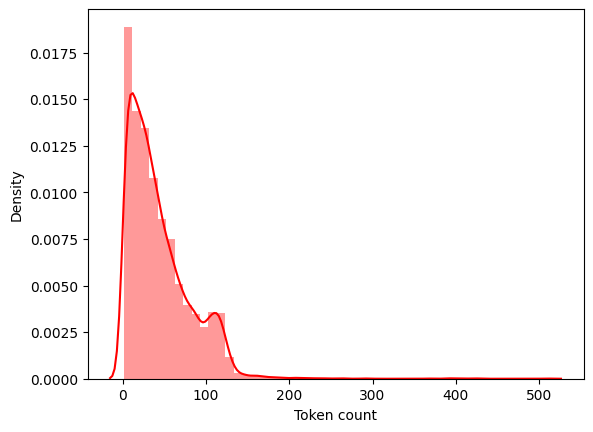

In [33]:
sns.distplot(token_lengths, color='red')
# plt.xlim([0, 512]);
plt.xlabel('Token count');

In [34]:
max(token_lengths)

510

In [35]:
# as we see maximum token length is around 160, where as less no of sentences having length more than 160, density is less
MAX_LEN = 160

# **Create Pytorch Dataset class**

In [36]:
from torch.utils.data import  Dataset, DataLoader

In [37]:
class GoogleReviewDataset(Dataset):
    def __init__(self, tokenizer, reviews, sentiments, max_len):
        self.sentiments = sentiments
        self.tokenizer= tokenizer
        self.reviews = reviews
        self.max_len = max_len
    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, index):
        # get the relevant review
        # get corresponding sentiment
        # apply tokenizer
        # return review text, input ids, attention_mask, targets
        review= self.reviews[index]
        target= self.sentiments[index]

        # tokenize the op
        encoding = self.tokenizer.encode_plus(
            review, 
            add_special_tokens=True,
            max_length= self.max_len,
            return_token_type_ids= False,
            pad_to_max_length=True,
            return_attention_mask= True,
            return_tensors='pt'
        )
        return {
            'review_text': review,
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'targets': torch.tensor(target, dtype=torch.long)
        }

In [38]:
df.columns

Index(['userName', 'userImage', 'content', 'score', 'thumbsUpCount',
       'reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'sortOrder',
       'appId', 'sentiment'],
      dtype='object')

In [39]:
df = df[['content', 'sentiment']]
df.sample(2)

,content,sentiment
2623,When u want to add check list this will help y...,0
15390,I love this app. I have always been a Frankli...,2


In [40]:
# The tokenizer is doing most of the heavy lifting for us. We also return the review texts, 
# so it’ll be easier to evaluate the predictions from our model. Let’s split the data:

from sklearn.model_selection import  train_test_split

RANDOM_SEED= 42

## create train data & test data 
df_train, df_test = train_test_split(
  df,
  test_size=0.1,
  random_state=RANDOM_SEED,
  shuffle=True
)

# Split test data further to create validation data

df_val, df_test = train_test_split(
  df_test,
  test_size=0.5,
  random_state=RANDOM_SEED,
  shuffle=True
)

print("Training data shape :", df_train.shape[0])
print("Testing data shape :", df_test.shape[0])
print("Validation data shape :", df_val.shape[0])

Training data shape : 14171
Testing data shape : 788
Validation data shape : 787


In [41]:
df_train

,content,sentiment
1562,You can't have your to do list as notifications,0
15084,I haven't been using this very long and it's n...,1
7417,1. Кривой и неработающий экспорт и импорт. 2. ...,1
12044,Love it so far. Wish it had a widget for Andro...,1
12410,Liked the prioritization by dragging and the h...,0
...,...,...
5191,This app is not getting opened pls look after ...,0
13418,Do not download this app. There are Ads everyt...,0
5390,The app keeps stopping repeatedly. It would be...,1
860,Very helpful and detailed app...love it!,2


In [42]:
df_train.head(1)

,content,sentiment
1562,You can't have your to do list as notifications,0


In [43]:
## testing of GoogleReviewDataset class
data_obj = GoogleReviewDataset(tokenizer, df_train['content'].values, df_train['sentiment'].values, 160)
data_obj[0]

{'review_text': "You can't have your to do list as notifications",
 'input_ids': tensor([  101,  1192,  1169,   112,   189,  1138,  1240,  1106,  1202,  2190,
          1112,  1136, 25583,   102,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0, 

# **Create DataLoader**

In [44]:
df_train.columns

Index(['content', 'sentiment'], dtype='object')

In [45]:
df_train.columns

Index(['content', 'sentiment'], dtype='object')

In [48]:
# We also need to create a couple of data loaders. Here’s a helper function to do it:
# data loader will create batches
# fetch data from GoogleReviewDataset class & create batches as per batch size

def create_data_loader(df, tokenizer, max_len, batch_size):
    ds = GoogleReviewDataset(
                            reviews=df.content.to_numpy(),
                            sentiments=df.sentiment.to_numpy(),
                            tokenizer=tokenizer,
                            max_len=max_len
                        )

    return DataLoader(
                        ds,
                        batch_size=batch_size,
                        num_workers=4
                    )
    

BATCH_SIZE = 16
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [47]:
# for batch in train_data_loader:
#     print(batch)
#     break

In [ ]:
data = next(iter(train_data_loader))
data.keys()

In [1]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

NameError: name 'data' is not defined